# Regresion Huber

La **regresión Huber** es un tipo de modelo robusto que combina las ventajas de la regresión lineal y de la función de pérdida absoluta (como en la regresión robusta) para ser menos sensible a valores atípicos. La función de pérdida Huber es cuadrática para errores pequeños y lineal para errores grandes, lo que permite que el modelo sea robusto a los valores atípicos sin dejar de ajustar bien los datos "normales".

La **función de pérdida de Huber** se define como:

$$
L_{\delta}(r) = 
\begin{cases} 
\frac{1}{2}r^2 & \text{si } |r| \leq \delta \\
\delta(|r| - \frac{1}{2}\delta) & \text{si } |r| > \delta 
\end{cases}
$$

Donde:
- $r = y_{\text{real}} - y_{\text{predicho}}$ es el residual o error.
- $\delta$ es un hiperparámetro que controla la transición entre la pérdida cuadrática y la pérdida lineal.

## Cuándo usar la Regresión Huber
- Si los datos tienen **valores extremos** que podrían afectar el modelo de regresión lineal estándar.
- Si se desea un balance entre la sensibilidad del modelo a los datos "normales" y la robustez frente a valores extremos.

El modelo Huber es más robusto frente a los valores extremos que una regresión lineal tradicional, y los coeficientes reflejan esto al no ser tan afectados por los valores atípicos.

Error Cuadrático Medio (MSE): 9.35
Coeficientes del modelo: [2.9455228]
Intercepto: 4.014517398017907


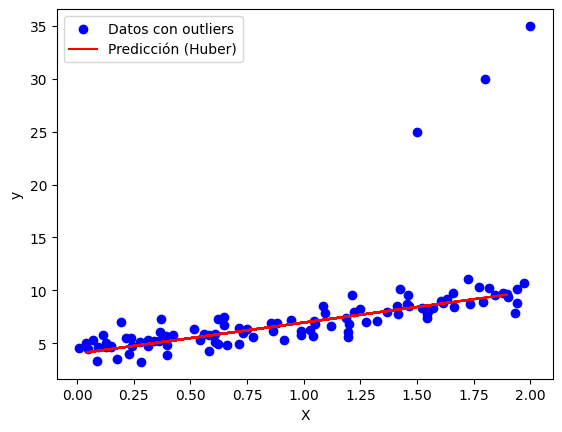

In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear un conjunto de datos de ejemplo con algunos valores atípicos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Introducir valores atípicos
X_outliers = np.array([[1.5], [1.8], [2.0]])
y_outliers = np.array([[25], [30], [35]])

X = np.vstack((X, X_outliers))
y = np.vstack((y, y_outliers))

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión Huber
huber = HuberRegressor(alpha=0.0, epsilon=1.35)  # epsilon controla la transición a la pérdida lineal

# Entrenar el modelo con los datos de entrenamiento
huber.fit(X_train, y_train.ravel())

# Predecir en el conjunto de prueba
y_pred = huber.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

# Mostrar los coeficientes del modelo
print(f"Coeficientes del modelo: {huber.coef_}")
print(f"Intercepto: {huber.intercept_}")

# Visualizar los resultados
plt.scatter(X, y, color='blue', label='Datos con outliers')
plt.plot(X_test, y_pred, color='red', label='Predicción (Huber)')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()